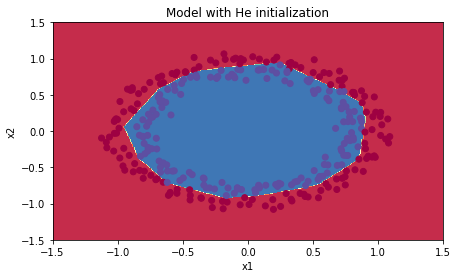

In [16]:
# 加载系统工具库
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

# 加载自定义的工具库
from init_utils import *

# 设置好画图工具
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
train_x ,train_y , test_x , test_y = load_dataset()

def init_parameters_zero(dims):
    
    L = len(dims)# 神经网络层数
    parameters = {}
    for l in range(1,L):
        parameters["W" + str(l)] = np.zeros((dims[l],dims[l-1]))
        parameters["b" + str(l)] = np.zeros((dims[l],1))
    return parameters  
def init_parameters_random(dims):
    
    L = len(dims)# 神经网络层数
    parameters = {}
    for l in range(1,L):
        parameters["W" + str(l)] = np.random.randn(dims[l],dims[l-1]) * 10
        parameters["b" + str(l)] = np.zeros((dims[l],1))
    return parameters   
def init_parameters_random_set(dims):
    
    L = len(dims)# 神经网络层数
    parameters = {}
    for l in range(1,L):
        parameters["W" + str(l)] = np.random.randn(dims[l],dims[l-1]) * np.sqrt(2 / dims[l-1])#更小
        parameters["b" + str(l)] = np.zeros((dims[l],1))
    return parameters   

def model(X,Y,learning_rate=0.01,t_number=15000,print_cost=True,init_type="zero"):
    
    dims = [X.shape[0],10,5,1]
    if init_type == "zero":
        parameters = init_parameters_zero(dims)
    elif init_type =="random":
        parameters = init_parameters_random(dims)
    elif init_type =="random_set":
        parameters = init_parameters_random_set(dims)
    
    costs =[]
    for i in range(0, t_number):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # 画出成本走向图
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
    
# # 用全0初始化法进行参数训练
# parameters = model(train_x, train_y, init_type = "random_set")
# print ("On the train set:")
# predictions_train = predict(train_x, train_y, parameters) # 对训练数据进行预测，并打印出准确度
# print ("On the test set:")
# predictions_test = predict(test_x, test_y, parameters) # 对训测试数据进行预测，并打印出准确度 
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)